In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from tensorflow.keras.layers import Input,LSTM,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD

In [7]:
series = np.sin((0.1*np.arange(400))**2)

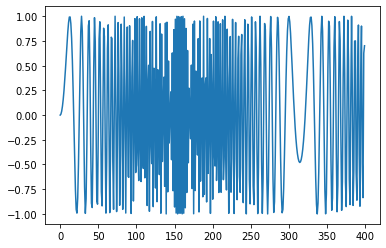

In [8]:
plt.plot(series)
plt.show()

In [9]:
T=10
D=1
X,Y=[],[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
    
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print('X.shape = ',X.shape,'Y.shape',Y.shape)

X.shape =  (390, 10) Y.shape (390,)


In [10]:
X=X.reshape(-1,T,1)
i=Input(shape=(T,D))
x=LSTM(10)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.05))

r=model.fit(X[:-N//2],Y[:-N//2] ,batch_size=32, epochs=200 , validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/200
7/7 [==============================] - 1s 164ms/step - loss: 0.5251 - val_loss: 0.5402
Epoch 2/200
7/7 [==============================] - 0s 16ms/step - loss: 0.4834 - val_loss: 0.5855
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 0.4295 - val_loss: 0.4885
Epoch 4/200
7/7 [==============================] - 0s 15ms/step - loss: 0.3591 - val_loss: 0.4246
Epoch 5/200
7/7 [==============================] - 0s 15ms/step - loss: 0.2501 - val_loss: 0.3747
Epoch 6/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1331 - val_loss: 0.2177
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1043 - val_loss: 0.1613
Epoch 8/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0863 - val_loss: 0.1854
Epoch 9/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0818 - val_loss: 0.1730
Epoch 10/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0419 - val_loss: 0.1487
Epoch 11/200
7/7 [

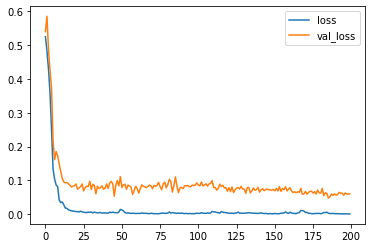

In [11]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(390, 1)


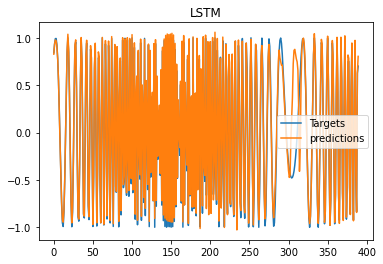

In [12]:
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y,label='Targets')
plt.plot(predictions,label='predictions')
plt.title('LSTM')
plt.legend()
plt.show()

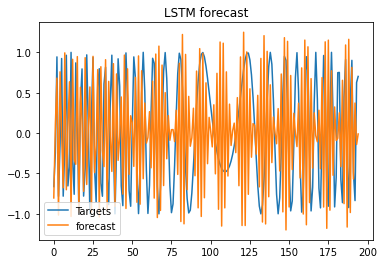

In [14]:
forecast=[]
input_=X[-N//2]
while len(forecast)<len(Y[-N//2:]):
    f=model.predict(input_.reshape(1,T,1))[0,0]
    forecast.append(f)
    input_=np.roll(input_,-1)
    input_[-1]=f

plt.plot(Y[-N//2:],label='Targets')
plt.plot(forecast,label='forecast')
plt.title('LSTM forecast')
plt.legend()
plt.show()